In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# some constants
dx = 0.05
c = 1.0
k = 0.01
baselevel_rate = 0.01
num_steps = 1000
Hstar = 1.0e-3
beta = 1
alpha1 = 2

In [3]:
# a function
def evolve_with_bedrock_and_abrasion(c, k, beta, dx=0.01, Hstar=1.0, baselevel_rate=0.01, porosity = 0.55, num_steps = 1000):
    
    # set up grid
    x = np.arange(0.0, 1.0 + dx, dx)
    
    # set sediment thickness
    H = Hstar + np.zeros(len(x))
    H[-1] = 0.0
    
    # set bedrock elev
    etab = -H
    
    # set total elev
    eta = etab + H
    
    # create array to hold erosion
    ero = np.zeros(len(x))
    
    # set discharge as fxn of downstream distance
    q = x
    
    # create array to hold sediment flux (first node is left edge of 0th cell)
    qs = np.zeros(len(x))
    
    # set time step size
    dt = 0.2 * dx * dx / c

    for t in range(num_steps):
        # lower baselevel
        eta[-1] -= baselevel_rate * dt
        
        # set boundary conditions
        etab[-1] = eta[-1]
        
        # calc slope
        S = -np.diff(eta) / dx
        
        # calc bed cover
        efac = np.exp(-H / Hstar)
        
        # calc bed sed flux
        qs[1:] = c * q[1:] * S * (1.0 - efac[:-1])
        
        # calc bedrock erosion from plucking
        ero_pluck = efac[:-1] * (k * q[1:] * S)
        
        # calc bedrock erosion from abrasion
        ero_abr = efac[:-1] * (beta * qs[1:])
        
        # calc bedrock erosion rate from stream power and abrasion
        ero[:-1] = ero_pluck + ero_abr
        
        # calc change in bedrock elev
        etab[:-1] -= ero[:-1] * dt
        
        # grain attrition
        grain_atr = beta * qs[1:]
        
        # contributions to alluvial layer thickness
        # ero_pluck could be multipled by some parameter alpha 
        # to represent that only a fraction of plucked material contributes to alluvium/bedload
        H[:-1] += -((1 / porosity) * ((np.diff(qs)/dx) + grain_atr - ero_pluck)) * dt
        
        # update elev
        eta[:-1] = etab[:-1] + H[:-1]

    return eta, etab, H, qs, ero_pluck, ero_abr, ero, grain_atr, x

In [4]:
eta, etab, H, qs, ero_plucking, ero_ab, ero, grain_atr, x = evolve_with_bedrock_and_abrasion(c,
                                                                                            k,
                                                                                            beta,
                                                                                            dx,
                                                                                            Hstar,
                                                                                            baselevel_rate)

(0, 1)

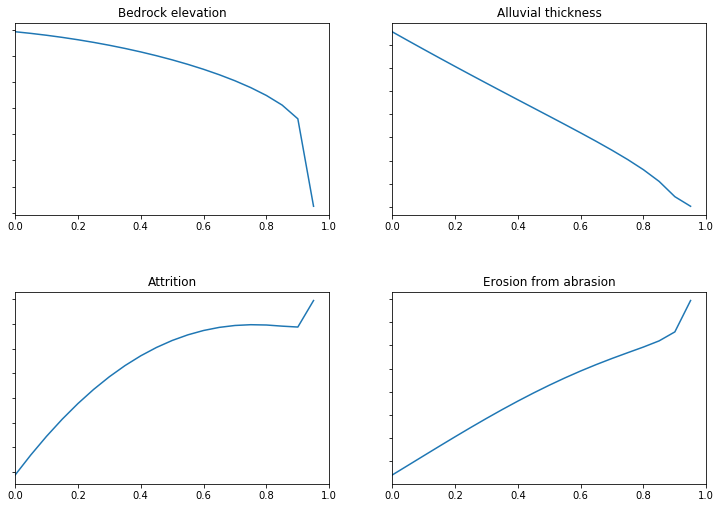

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12, 8))
# fig.tight_layout(pad=3.0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

ax1.plot(x[:-1], etab[:-1])
ax1.set_title('Bedrock elevation')
ax1.yaxis.set_ticklabels([])
ax1.set_xlim(0, 1)

ax2.plot(x[:-1], H[:-1])
ax2.set_title('Alluvial thickness')
ax2.yaxis.set_ticklabels([])
ax2.set_xlim(0, 1)

ax3.plot(x[:-1], grain_atr)
ax3.set_title('Attrition')
ax3.yaxis.set_ticklabels([])
ax3.set_xlim(0, 1)

ax4.plot(x[:-1], ero_ab)
ax4.set_title('Erosion from abrasion')
ax4.yaxis.set_ticklabels([])
ax4.set_xlim(0, 1)

In [6]:
# a curiosity to be solved another time: why does this not work?

# # a function
# def evolve_with_bedrock_and_abrasion(c, k, beta, dx=0.01, Hstar=1.0, baselevel_rate=0.01, porosity = 0.55, num_steps = 1000):
#     x = np.arange(0.0, 1.0 + dx, dx)
#     H = Hstar + np.zeros(len(x))
#     H[-1] = 0.0
#     etab = -H
#     eta = etab + H
#     ero = np.zeros(len(x))
#     q = x
#     qs = np.zeros(len(x))
#     dt = 0.2 * dx * dx / c
    
#     for t in range(num_steps):
#         eta[-1] -= baselevel_rate * dt
#         etab[-1] = eta[-1]
#         S = -np.diff(eta)/dx
#         efac = np.exp(-H / Hstar)
        
#          # calc bed sed flux
#         qs[1:] = c * q[1:] * S * (1.0 - efac[:-1]) # calc sediment flux
        
#          # calc bedrock erosion from stream power
#         ero_sp = efac[:-1] * (k * q[1:] * S)

#          # calc bedrock erosion from abrasion
#         ero_ab = efac[:-1] * (beta * qs[1:])
    
#          # calc bedrock erosion rate from stream power and abrasion
#         ero[:-1] = ero_sp + ero_ab
        
#          # calc change in bedrock elev
#         etab[:-1] -= ero[:-1] * dt

#          # grain attrition
#         attrition = beta * qs[1:]
        
#          # this also works for H
#         H[:-1] += -((1 / porosity) * ((np.diff(qs)/dx) + attrition - ero_sp)) * dt

#          # update elev
#         eta[:-1] = etab[:-1] + H[:-1]
        
#         return eta, etab, H, qs, ero_sp, ero_ab, ero, attrition, x